# Introduction

For us to estimate the best function or the model for prediction, the sample must be repreentative of the whole population.... That is the error on the hypothesis must be the smallest and The out-sample-error or risk must be equal to the in-sample-risk, for which to happen, again the sample must be representative of the whole population

Probably after estimating the polynomial of degree 20 in the example given, we might say voila! lets go home, everything is fine, there minimimum bial or deterministic error and we can go home but no there is something else which can fuck up everything which is Noise!

Fitting to the noise causes overfitting!

## Entire game is of predictive power!

The error which came when we were trying to predict the sigmoidal function using a straight line was called bias but there is another error which comes in ml problems, which is variance.

## Which is the error associated with overfitting

#### A little discussion about scikit.learn

When doing a 3rd degree polynomial fit on a sample of one feature for example, what scikit learn will do is raise them to the power equal to the degree of polynomial, rows representing the samples and columns as the features.

### Entire machine learning is the game of minimizing the test error!

Make your model, fit your model, and then predict your model!

When we divide the dataset in two different groups i.e. the test set and the training set, we train using particular group and then we contaminate it with another one, which we want to avoid, so what we do is we select a validation group in the training set and check on it, and to reduce the variance, we change the validation group and this process is known as cross validation.

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
def make_simple_plot():
    fig, axes=plt.subplots(figsize=(12,5), nrows=1, ncols=2);
    axes[0].set_ylabel("$y$")
    axes[0].set_xlabel("$x$")
    axes[1].set_xlabel("$x$")
    axes[1].set_yticklabels([])
    axes[0].set_ylim([-2,2])
    axes[1].set_ylim([-2,2])
    plt.tight_layout();
    return axes
def make_plot():
    fig, axes=plt.subplots(figsize=(20,8), nrows=1, ncols=2);
    axes[0].set_ylabel("$p_R$")
    axes[0].set_xlabel("$x$")
    axes[1].set_xlabel("$x$")
    axes[1].set_yticklabels([])
    axes[0].set_ylim([0,1])
    axes[1].set_ylim([0,1])
    axes[0].set_xlim([0,1])
    axes[1].set_xlim([0,1])
    plt.tight_layout();
    return axes

In [3]:
df = pd.read_csv("religion.csv")
df.head()

,promney,rfrac
0,0.047790,0.00
1,0.051199,0.01
2,0.054799,0.02
3,0.058596,0.03
4,0.062597,0.04


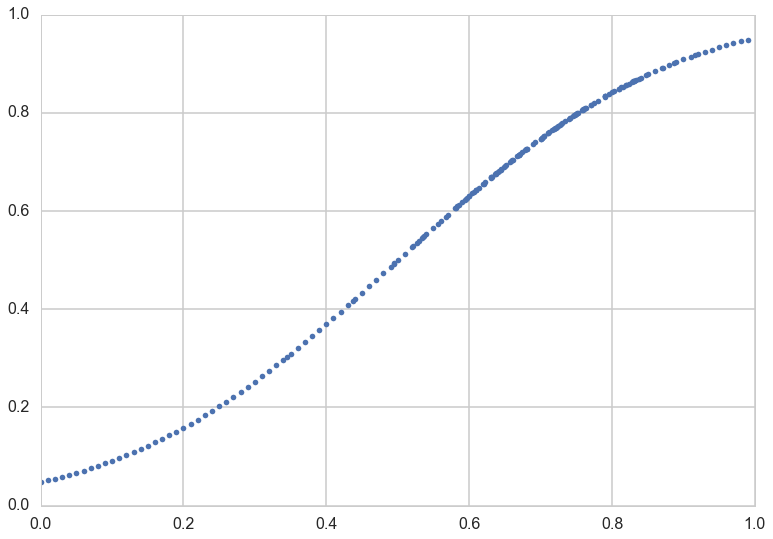

In [4]:
x = df.rfrac
y = df.promney
plt.plot(x, y, '.')

Notice that our sampling of x is not quite uniform: there are more points around x of 0.7.

Now, in real life we are only given a sample of points. Lets assume that out of this population of 200 points we are given a sample  of 30 data points. Such data is called in-sample data. Contrastingly, the entire population of data points is also called out-of-sample data.

In [10]:
indexes = np.sort(np.random.choice(x.shape[0], size = 30, replace = False))
samplex = x[indexes]
sampley = y[indexes]

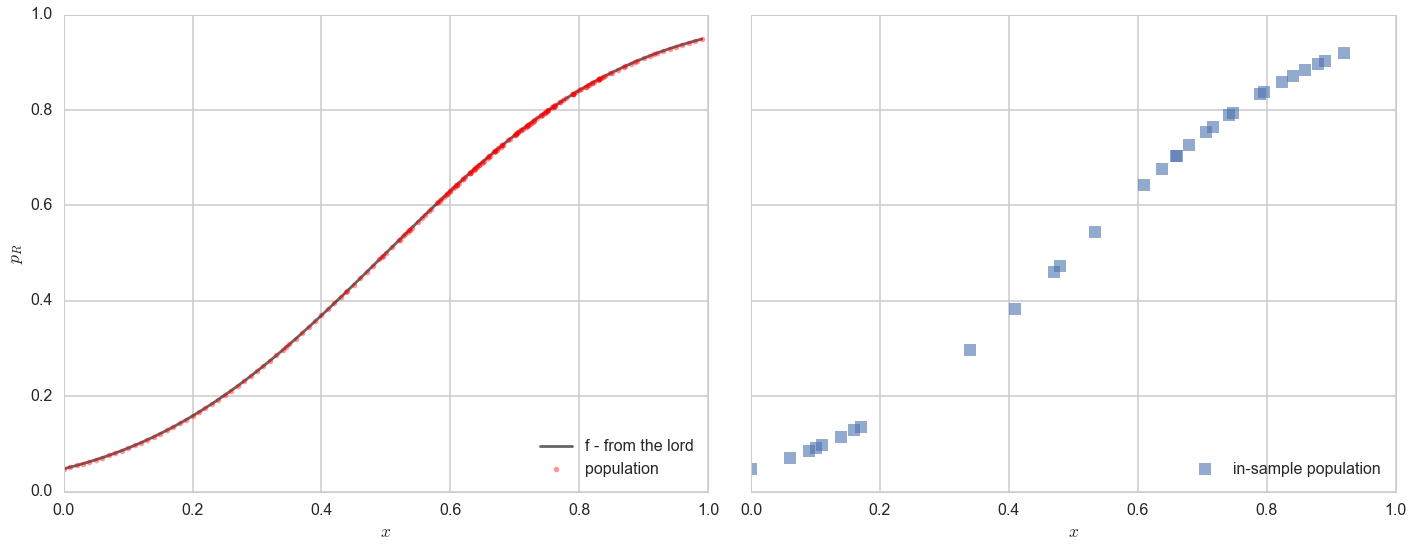

In [13]:
axes = make_plot()
axes[0].plot(x, y, 'k-', alpha = 0.6, label = 'f - from the lord')
axes[0].plot(x, y, 'r.', alpha = 0.4, label = 'population')
axes[1].plot(samplex, sampley, 's', alpha = 0.6, label = "in-sample population")
axes[0].legend(loc = 4)
axes[1].legend(loc = 4)

In real life we won't know about the left curve..
That is, imagine the Lord gave us f but then also gave us amnesia. Remember that such amnesia is the general case in learning, where we do not know the target function, but rather just have some data. Thus what we will be doing is trying to find functions that might have generated the 30 points of data that we can see in the hope that one of these functions might approximate f well, and provide us a predictive model for future data. This is known as fitting the data.

## The Hypothesis or Model Space

Such a function, one that we use to fit the data, is called a hypothesis.

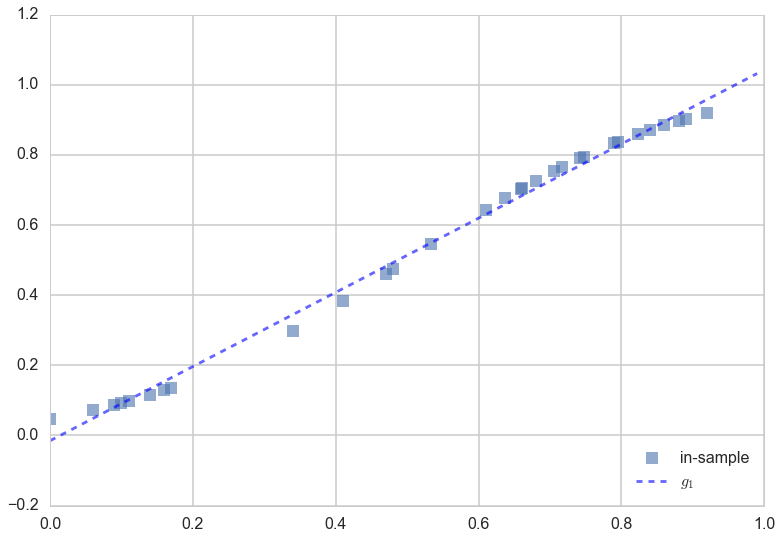

In [16]:
g1 = np.poly1d(np.polyfit(x[indexes], y[indexes], 1))
plt.plot(x[indexes],y[indexes], 's', alpha=0.6, label="in-sample");
plt.plot(x,g1(x), 'b--', alpha=0.6, label="$g_1$");
plt.legend(loc=4);

Now as written in the introduction, we are always gonna have some bias, and our job is to minimise that. Lets check it with a 20th order polynomial.

/usr/local/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


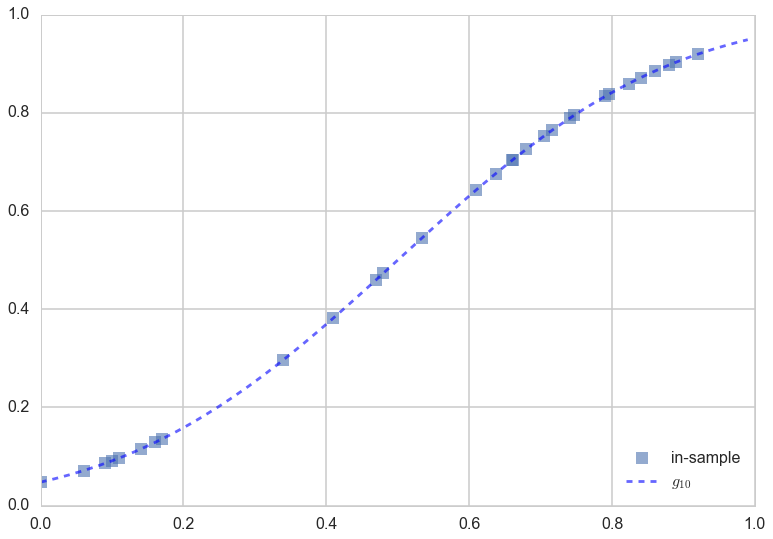

In [17]:
g20 = np.poly1d(np.polyfit(x[indexes], y[indexes], 20))
plt.plot(x[indexes],y[indexes], 's', alpha=0.6, label="in-sample");
plt.plot(x,g20(x), 'b--', alpha=0.6, label="$g_{10}$");
plt.legend(loc=4);

Voila! You can see the 20th order polynomial does a much better job of tracking the points, because of the wiggle room it has in making a curve "go near or through" all the points as opposed to a straight line, which well, cant curve. Thus it would seem that 10 might be a better candidate hypothesis set from which to choose a best fit model.


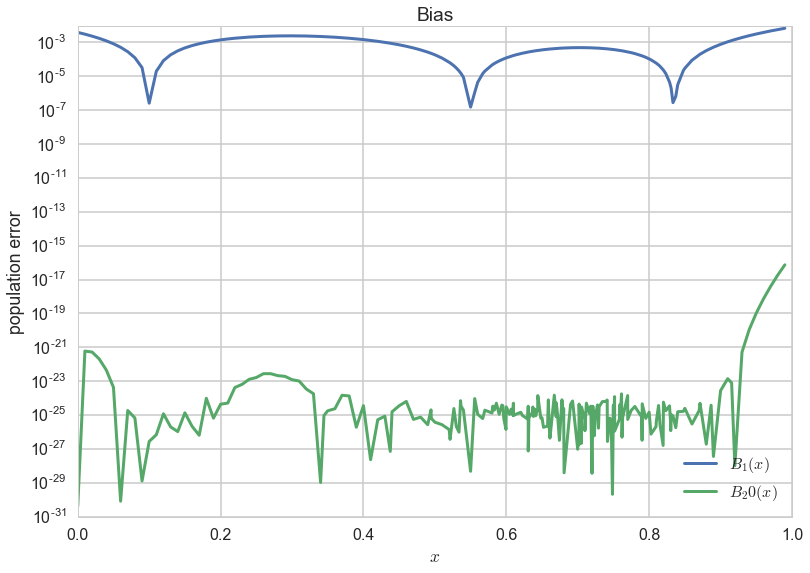

In [18]:
plt.plot(x, (g1(x) - y) ** 2, lw = 3, label = "$B_1(x)$")
plt.plot(x, (g20(x) - y) ** 2, lw = 3, label = "$B_20(x)$")
plt.xlabel("$x$")
plt.ylabel("population error")
plt.yscale("log")
plt.legend(loc=4);
plt.title("Bias");

As you can see the bias or approximation error is much smaller for 

Now as said in introduction we'd start to think, we can go home as we have got the best fit for our in-sample which has very low bias. BUT NO! Theres another error to worry about which is, noise.

Here our learner is called Polynomial Regression, and it takes a hypothesis space d of degree d polynomials, minimizes the "squared-error" risk measure, and spits out a best-fit hypothesis gd

Intuitively, to do this, we need to ask ourselves, how representative is our sample? Or more precisely, how representative is our sample of our training points of the population (or for that matter the new x that we want to predict for)?

Once we have done that, we can then intuitively say that, if we find a hypothesis g that minimizes the cost or risk over the training set; this hypothesis might do a good job over the population that the training set was representative of, since the risk on the population ought to be similar to that on the training set, and thus small.


Hence we can now say that our first job is to find the best fit for a polynomial of degree d that minimises the bias and then we want that out of sample risk is nearly equal to that of in sample risk!

## NOISE

We saw in the diagram above that g20 did a very good job in capturing the curves of the population. However, note that the data obtained from f, our target, was still quite smooth. Most real-world data sets are not smooth at all, because of various effects such as measurement errors, other co-variates, and so on. Such stochastic noise plays havoc with our fits, as we shall see soon.

In [24]:
sigma=0.06
mask=(x > 0.65) & (x < 0.8)
sigmalist=sigma+mask*0.03
sigmalist.head()
#len(mask[(x > 0.65) & (x < 0.8)])

0    0.06
1    0.06
2    0.06
3    0.06
4    0.06
Name: rfrac, dtype: float64

In [27]:
f = y + sp.stats.norm.rvs(scale=sigmalist, size=200)
#the next three lines just ensure that y remains a probability
fadd = (f < 0.0) *(0.01-f)
fsub = (f > 1.0)*(f - 1.0)
f = f + fadd -fsub

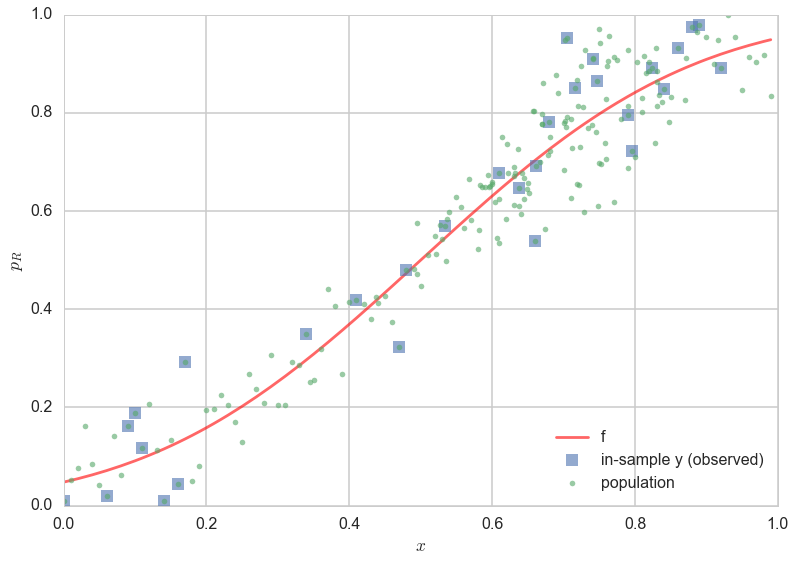

In [33]:
plt.plot(x,y, 'r-', alpha=0.6, label="f");
plt.plot(x[indexes], f[indexes], 's', alpha=0.6, label="in-sample y (observed)")
plt.plot(x, f, '.', alpha = 0.6, label = "population")
plt.xlabel('$x$');
plt.ylabel('$p_R$')
plt.legend(loc = 4)

Now if we'll try to fit the curves on this kind of data set, it'd overfit and wiggle maniacly in a polynomial of degree 20.

## The Variance of your model¶


This tendency of a more complex model to overfit, by having enough freedom to fit the noise, is described by something called high variance. What is variance?
Variance, simply put, is the "error-bar" or spread in models that would be learnt by training on different data sets d1,d2,... drawn from the population. Now, this seems like a circular concept, as in real-life, you do not have access to the population. But since we simulated our data here anyways, we do, and so let us see what happens if we choose different 30 points randomly from our population of 200, and fit models in both h1 and h20 to them. We do this on 200 sets of randomly chosen (from the population) data sets of 30 points each and plot the best fit models in noth hypothesis spaces for all 200 sets.

So far?

you have learnt the basic formulation of the learning problem, the concept of a hypothesis space, and a strategy using minimization of distance (called cost or risk) to find the best fit model for the target function from this hypothesis space.

You learned the effect of noise on this fit, and the issues that crop up in learning target functions from data, chiefly the problem of overfitting to this noise.

The process of learning has two parts:

1. Fit for a model by minimizing the in-sample risk

2. Hope that the in-sample risk approximates the out-of-sample risk well.